Lab 3 Statistics

Challenge 1
Find a and b, if median=42, mean=50
20, 34, 34,  12, 56, 110, 49, a, b.
Let's suppose $a <= b$.
We know that *a + b + 315 = 9 * 50*,
ie $a + b = 135$.
We deduce that $b >= 135/2 = 67.5$ and $a <= 67.5$.
The sequence has 9 numbers including a and b, so the median is one of the 9. It is not among the given numbers, so it must be a or b. a is the only possibility. Let's check that this value works and raise the given mean and median. We deduce that :
$b = 135 - a = 93$
This assure that the mean is 50.
If we sort the sequence ascendingly, we correctly find that $a = 42$ ranks 5th and makes the median equal to 42.

Challenge 2
A car hit an average speed of v1 = 60 kmph in the first half of the journey, and hit an average speed of v2 = 110 kmph in the second half of the journey. Determine the average speed of the car.

Let's call v the speed of the car during the day, $t_{0}$ the time at the beginning of the day, $t_{1}$ the time at noon and $t_{2}$ the time at the end of the day. We look for $v_{av} = \int_{t_{0}}^{t_{2}}v(t)dt / (t_{2} - t_{0})$.

We know that $t_{1}$ is the middle of the day, ie $t_{2} - t_{1} = t_{1} - t_{0} = d /2$ if we call $d$ the time that the car has spent running during the whole day,

$\int_{t_{0}}^{t_{1}}v(t)dt / (t_{1} - t_{0}) = 60$,

$\int_{t_{1}}^{t_{2}}v(t)dt / (t_{2} - t_{1}) = 115$.

Let's calculate :
$v_{av} * d = \int_{t_{0}}^{t_{2}}v(t)dt = \int_{t_{0}}^{t_{1}}v(t)dt + \int_{t_{1}}^{t_{2}}v(t)dt = (60 + 115) * d / 2$,
ie $v_{av} = 87.5$.





Challenge 3
The lifetimes of 400 light-bulbs were found to the nearest hour. The results were recorded as
follows.
Lifetime (hours) 0–199 200–399 400–599 600–799 800–999 1000–1199 1200–1999
Frequency         143     97      64      51      14      14        17
Construct a histogram and cumulative frequency polygon for this dataset. Estimate the percentage
of bulbs with lifetime less than 480 hours.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
lifetimes = pd.DataFrame(columns = ['Lifetime', 'Frequency'], data = [['0–199', 143], ['200–399', 97], ['400–599', 64], ['600–799', 51], ['800–999', 14], ['1000–1199', 14], ['1200–1999', 17]])
lifetimes

,Lifetime,Frequency
0,0–199,143
1,200–399,97
2,400–599,64
3,600–799,51
4,800–999,14
5,1000–1199,14
6,1200–1999,17


In [5]:
lifetimes['cum_freq'] = lifetimes['Frequency'].cumsum()
lifetimes

,Lifetime,Frequency,cum_freq
0,0–199,143,143
1,200–399,97,240
2,400–599,64,304
3,600–799,51,355
4,800–999,14,369
5,1000–1199,14,383
6,1200–1999,17,400


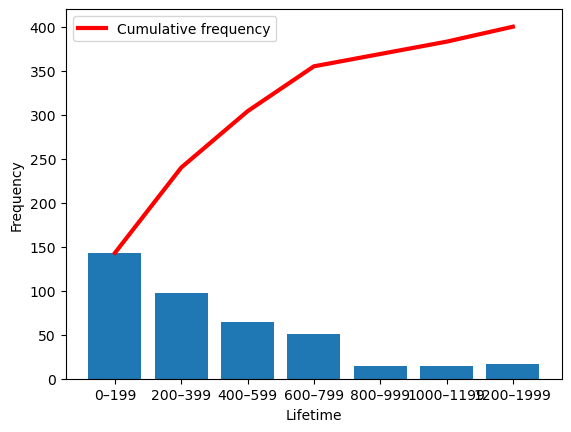

In [14]:
plt.bar(lifetimes['Lifetime'], lifetimes['Frequency'])
plt.plot(lifetimes['Lifetime'], lifetimes['cum_freq'], linewidth = 3, color = 'red', label = 'Cumulative frequency')
plt.xlabel('Lifetime')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We estimate the cumulative frequency for light_bulbs with lifetime less than 480 hours by taking the linear interpolation. Hence we find :

$Cumulative frequency(480) = Cumulative frequency(200-399) + 80/200 * frequency(400-599) = 257$

Challenge 4
The time between arrival of 60 patients at an intensive care unit were recorded to the nearest hour.
The data are shown below.
Time (hours) 0–19 20–39 40–59 60–79 80–99 100–119 120–139 140–159 160–179
Frequency     16    13    17    4     4      3       1      1       1
Determine the median, mean and standard deviation for this dataset.

To calculate these values, I take the repartition of the times of arrival of the patients to be linear in each interval, excluding the boundaries of each interval.

In [15]:
patients = pd.DataFrame(columns = ['Time', 'Frequency'], data = [['0–19', 16], ['20–39', 13], ['40–59', 17], ['60–79', 4], ['80–99', 4], ['100–119', 3], ['120–139', 1], ['140–159', 1], ['160–179', 1]])
patients

,Time,Frequency
0,0–19,16
1,20–39,13
2,40–59,17
3,60–79,4
4,80–99,4
5,100–119,3
6,120–139,1
7,140–159,1
8,160–179,1


In [17]:
patients_list = []
for i in range(9) :
    for j in range(patients['Frequency'][i]) :
        freq = 20 * i + 20 * (1 + j) / (1 + patients['Frequency'][i])
        patients_list.append(freq)

In [20]:
(np.mean(patients_list), np.median(patients_list), np.std(patients_list))

(47.0, 41.66666666666667, 36.83651279876766)

Challenge 5
One player rolls two dices. Describe the measurable space and the random variable for:
* A. The values that the player obtains.

$\Omega = \{(i, j), for i, j \in \{ 1, 2, 3, 4, 5, 6 \} \}$,

$P(i, j) = 1 /36, for i, j \in \{ 1, 2, 3, 4, 5, 6 \}$
* B. The sum of the values obtained.

$\Omega = [2, 12] \cap \N$

$P(n) = (6 - |n - 7|) / 36 for n \in \Omega$
* C. The maximum value obtained after rolling both dices.

$\Omega = \{ 1, 2, 3, 4, 5, 6 \}$

$P(n) = (2 * n - 1) / 36 for n \in \Omega$

Describe the following events:
* Case A: Both values are greater than 5.

$P(A) = 4/36 = 1/9$
* Case B: The sum of values is even.

$P(B) = 18 / 36 = 1 / 2$
* Case C: The maximum is the value of both rolls.

$P(C) = 6 / 36 = 1 / 6$

Challenge 6
One player picks two cards from a poker deck. Describe the measurable space and the random variable for:
* A. The number of figures he picks.

$\Omega = \{0, 1, 2\}$

$P(0) = 2C40 / 2C52 = 40 * 39 / (52 * 51)$

$P(1) = 1C40 * 1C12 / 2C52 = 2 * 40 * 12 / (52 * 51)$

$P(2) = 2C12 / 2C52 = 12 * 11 / (52 * 51)$

* B. The sum of card values. Consider that the value of figures is 10 and the value of aces is 15.

$\Omega = [4, 25] \cap \N \cup \{30\}$
* C. The number of hearts or spades he picks.

$\Omega = \{0, 1, 2\}$

$P(0) = P(2) = 2C26 / 2C52$

$P(1) = 26 * 26 / 2C52$


Describe the following events:
* Case A: The number of figures in the cards the player picked is two.

$P(A) = 12 * 11 / (52 * 51)$

* Case B: The sum of card values is 17.
B is the union of the following events (we note as a couple (a, b) the event that the values of the two cards  are a and b) :
(1, 2), (2, 1), (7, b) for $b \in \{10, J, Q, K\}$, (8, 9), (9, 8), (a, 7) for $a \in \{10, J, Q, K\}$.
The probability of B is :

$P(B) * 2C52 = 4 * 4 * 4 + 2 * 4 * 16$

$P(B) = 2 * 192 / (52 * 51)$

* Case C: The value of both cards is less than 8.

$P(C) = 2C28 / 2C52$

Challenge 7
Two players roll a dice. Describe the measurable space and the random variable for:
* A. The score of player A.

$\Omega = \{1, 2, 3, 4, 5, 6\}$

* B. The greatest score.

$\Omega = \{1, 2, 3, 4, 5, 6\}$
* C. The earnings of player A if the game rules state that:  
"The player with the greatest score gets a coin from the other player.".

$\Omega = \{-1, 0, 1\}$

* D. The earnings of player A if the game rules state that:  
"The player with the greatest score gets as many coins as the difference between the score of player A and player B.". 

$\Omega = [-5, 5] \cap \N$

Describe the following events:
* Case A: The score of player A is 2.

$P(A) = 1 / 6$
* Case B: The greatest score is lower or equal than 2.

$P(B) = 4/36 = 1/9$
* Case C: Considering the case where the winner gets as many coins as the difference between scores (D), describe: 
  * Player A wins at least 4 coins.

  $P(C_{1}) = 3/36 = 1/12$
  * Player A loses more than 2 coins.

  $P(C_{2}) = 6/36 = 1/6$
  * Player A neither wins nor loses coins.

$P(C_{3}) = 6/36 = 1/6$

In [26]:
2 * 26 * 25 / (52 * 51) + 26 * 26 * 2 / (52 * 51) 

1.0